
# <div style="text-align:center"><span style="color:k; font-size:1em; "> Wine quality exploratory analysis 

#### by Anteneh Sade  
Started on 18 June 2018

<a id='hyperlink'> </a>
## Introduction 

This jupyter notebook contains the below listed steps to explore and compare the quality of wine by using the physicochemical properties of wine quality dataset. The project used a total of 3198 variants— 1,599 red, and a randomly selected 1,599 white wines of the Portuguese ‘Vinho Verde’ datasets. The quality of wine was evaluated by at least three wine experts who provided grades between 0 (Very bad) and 10 (Excellent) for each wine.   
1. [Understanding the wine and its variants](#understanding1)
2. [Understaing the datasets](#understanding2)
3. [Import data and essential packages](#import)
4. [Load, assess and prepare the dataset](#load)
5. [Descriptive statistics](#descriptive)
6. [Univariant analysis](#univariant)
7. [Discovering relationship bettwen attributes](#discover)
8. [Quality Vs. other attributes](#quality)
9. [Conclusion](#conclusion)
10. [References](#references)

<a id='understanding1'> </a>
## Understanding the wine and its variants 

Wikipedia defines __wine__ as an alcoholic drink made from fermented grape juice generally Vitis vinifera, fermented without the addition of sugars, acids, enzymes, water, or other nutrients. Around the world there many diffrent varieties of grapes; however, the most common type of are red or white. (Wine-Wikipedia, n.d.) <br>
<img src="RedWhite.png" align='center' style='width:450px'/> <br>
White wine is made with white grape, and red wine is made with dark red and black grapes. The main diffrence between red and white wine is that red wines are fermented with the grape skin and seeds and white wines are not. The skin of the grape gives the color and the flavor to the red wine. <br>
Wine quality depends upon a bunch of chemical properties that affect their taste, aroma, and flavor. So yes, even though winemaking is considered an art, it is pretty scientific if you think about it.

<a id='understanding2'> </a>
## Understanding the datasets
The data consists of two datasets containing information about red and white variants of the Portuguese “Vinho Verde” wine from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/wine+quality). The datasets contain 1599 red and 4898 white wines produced in Vinho Verde region of Portugal; however, an equal number of variants from both datasets was used in the analysis, with a total of 3198 variants. From the white wines dataset, 1599 observation were randomly selected. The dataset contains sensory and eleven laboratory-based test results. 

The eleven chemical properties:
- __Fixed Acidity:__        acid that contributes to the conservation of wine.
- __Volatile Acidity:__     amount of acetic acid in wine at high levels can lead to an unpleasant taste of vinegar.
- __Citric Acid:__          found in small amounts, can add “freshness” and flavor to wines.
- __Residual sugar:__       amount of sugar remaining after the end of the fermentation.
- __Chlorides:__            amount of salt in wine.
- __Free Sulfur Dioxide:__  it prevents the increase of microbes and the oxidation of the wine.
- __Total Sulfur Dioxide:__ it shows the aroma and taste of the wine.
- __Density:__              density of water, depends on the percentage of alcohol and amount of sugar.
- __pH:__                   describes how acid or basic a wine is on a scale of 0 to 14.
- __Sulphates:__             additive that acts as antimicrobial and antioxidant.
- __Alcohol:__              percentage of alcohol present in the wine.

In addition the data contains physiochemical properties, which is wine quality between zero (very bad) and ten (excellent) which is a sensory data.

<a id = 'import'></a>
## Import data and essential packages 

Import the essential packages/modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import (andrews_curves,parallel_coordinates)
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from tabulate import tabulate
import matplotlib.gridspec as gridspec

%matplotlib inline

For classifying the quality of the wine, assume that all wines with: 
   - ratings higher than or equal to 7 to be of good quality, 
   - wines ratings between 5 and 6 to be of average quality, and   
   - wines less than 5 to be of low quality.

In [2]:
# create a function that classifies the wine quality into low, medium and high
def test(quality):
    if quality >= 7:
        return 'high'
    elif 5 <= quality <7:
        return 'medium'
    else:
        return 'low'

<a id='load'> </a>
## Load, assess and prepare the datasets

In [3]:
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

red_wine = pd.read_csv(url_red, sep=';')
white_wi = pd.read_csv(url_white, sep = ';')

Before heading to manipulate the data, let us first check whether there are null values or not. 

In [4]:
pd.concat ([red_wine.isna().sum(), white_wi.isna().sum()], keys = ['Red wine', 'White wine'], axis =1)

,Red wine,White wine
fixed acidity,0,0
volatile acidity,0,0
citric acid,0,0
residual sugar,0,0
chlorides,0,0
free sulfur dioxide,0,0
total sulfur dioxide,0,0
density,0,0
pH,0,0
sulphates,0,0


>  _There are no missing values on both datasets._ ✌🏻

Then, take a sample of 1599 from white wine quality dataset

In [5]:
white_wine = white_wi.sample(1599)

##### Adding new column into the datasets 
Before merging the two datasets, add a new 'color' column to differentiate the data that comes from white and red wine dataset.

In [6]:
red_wine['color'] = 'Red'
white_wine['color'] = 'White'

##### Understanding target variable - quality

In [7]:
print('Red unique scores  ',np.sort(red_wine.quality.unique()))
print('White unique scores', np.sort(white_wine.quality.unique()))

Red unique scores   [3 4 5 6 7 8]
White unique scores [3 4 5 6 7 8 9]


>  _Both datasets have 3,4,5,6,7 and 8 as a unique quality score, and white wine additionally has 9._

Add a label column into both datasets and apply test function to classify the quality into high, medium and low.

In [8]:
red_wine['q_label'] = red_wine['quality'].apply(test)
white_wine['q_label'] =white_wine['quality'].apply(test)

In [9]:
# the number of counts in each class
pd.concat ([red_wine['q_label'].value_counts(), white_wine['q_label'].value_counts()], 
           keys = ['Red wine', 'White wine'], axis =1)

,Red wine,White wine
medium,1319,1189
high,217,343
low,63,67


> _In both datasets, the majority of the scores are concentrated around the'medium' quality class followed by 'high' and 'low' respectively._  

In [10]:
# merge the two datasets
red_white=pd.concat([red_wine,white_wine],axis=0)     
# shuffle red_white data for better randomization
red_white = shuffle(red_white).reset_index(drop = True)

In [11]:
red_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,q_label
0,5.5,0.28,0.21,1.6,0.032,23.0,85.0,0.99027,3.42,0.42,12.50,5,White,medium
1,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.20,6,Red,medium
2,6.4,0.31,0.31,12.9,0.045,55.0,161.0,0.99546,3.02,0.59,10.20,5,White,medium
3,10.1,0.43,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.00,7,Red,high
4,5.0,0.20,0.40,1.9,0.015,20.0,98.0,0.98970,3.37,0.55,12.05,6,White,medium


In [12]:
# the total number of the rows and columns
red_white.shape

(3198, 14)

>   _The dataset comprises of 3198 observations and 14 chracteriestics. <br>
>   Out of the 14 characterstics, one is dependent variable - quality,and 11 are independent variables - physicochemical characteristics_ 

<a id='descriptive'> </a>
## 👉Descriptive statistics

In [13]:
# summery statistics of the new dataset
red_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000
mean,7.585006,0.402894,0.302483,4.474093,0.066788,25.631019,91.927924,0.995367,3.247939,0.573740,10.482564,5.755472
std,1.549836,0.190513,0.164183,4.115531,0.042558,17.111176,59.545331,0.002808,0.163836,0.168159,1.158931,0.851277
min,3.800000,0.085000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987130,2.720000,0.250000,8.400000,3.000000
25%,6.600000,0.260000,0.210000,1.900000,0.043000,12.000000,37.000000,0.993382,3.140000,0.460000,9.500000,5.000000
50%,7.200000,0.350000,0.300000,2.400000,0.059000,22.000000,89.000000,0.995760,3.240000,0.550000,10.300000,6.000000
75%,8.200000,0.530000,0.400000,6.000000,0.080000,35.875000,135.000000,0.997380,3.360000,0.650000,11.300000,6.000000
max,15.900000,1.580000,1.000000,20.700000,0.611000,146.500000,366.500000,1.003690,4.010000,2.000000,14.900000,9.000000


> _No strange value in the dataset. No Negatives. <br>
> The overall mean of the quality column is around 5.76. <br> 
> A considerable difference between 75th %tile and max values of columns especially free sulfur dioxide and total sulfur dioxide and a mean value greater than median (50th %tile) suggests that the data contains major outliers in the high end of the distribution._

In [14]:
# summary statistics of the white wine
red_white[red_white['color']=='White'].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,6.850375,0.277967,0.333990,6.409381,0.046109,35.387117,137.388055,0.993988,3.184765,0.489331,10.542145,5.874922
std,0.833085,0.096531,0.118301,4.939891,0.023507,16.907720,43.307917,0.002899,0.147917,0.116537,1.242711,0.876970
min,3.800000,0.085000,0.000000,0.600000,0.012000,3.000000,9.000000,0.987130,2.720000,0.250000,8.500000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.035500,23.000000,107.000000,0.991705,3.085000,0.410000,9.400000,5.000000
50%,6.800000,0.260000,0.320000,5.400000,0.043000,34.000000,133.000000,0.993700,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,10.000000,0.050000,45.000000,167.000000,0.996060,3.275000,0.540000,11.400000,6.000000
max,11.800000,0.930000,1.000000,20.700000,0.346000,146.500000,366.500000,1.001960,3.800000,1.080000,14.050000,9.000000


In [15]:
# summary statistics of the red wine
red_white[red_white['color']=='Red'].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let us take out the means of the quality columns of both datasets.

In [16]:
col = [red_wine,white_wine,red_white]
m = []
for i in col:
        mx = round (i['quality'].mean(),3)
        m.append(mx)
d = {'Color': ['Red','White', 'Total'], 'Mean': m}
df_mean = pd.DataFrame(data=d)
df_mean


,Color,Mean
0,Red,5.636
1,White,5.875
2,Total,5.755


> _White wine has greater average quality than red wine._

<a id='univariant'> </a>
## 👉 Univariate Analysis

Let us see the outliers.

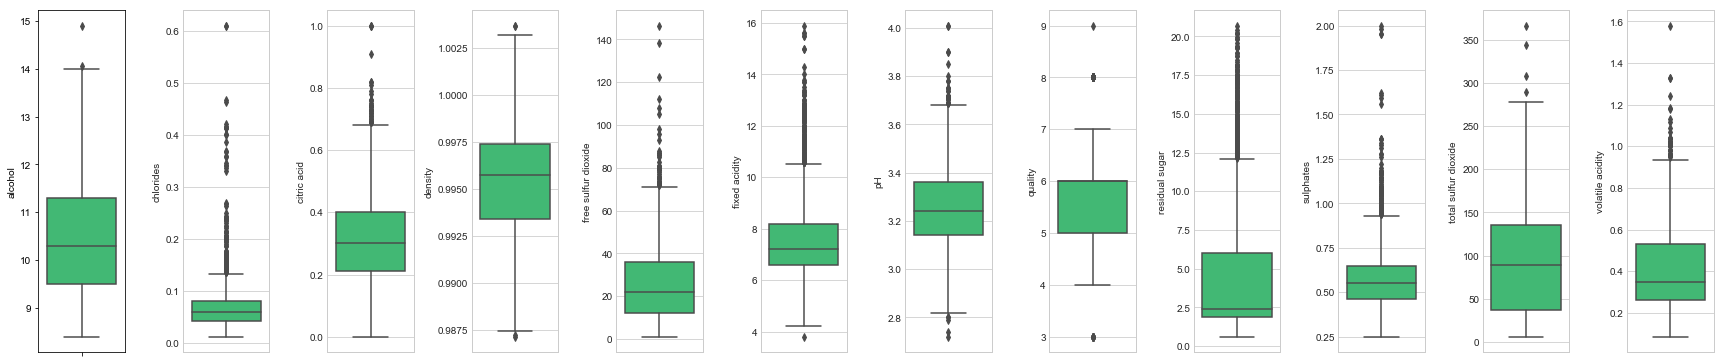

In [17]:
selected = ['alcohol','chlorides','citric acid','density','free sulfur dioxide','fixed acidity','pH','quality','residual sugar',
               'sulphates', 'total sulfur dioxide', 'volatile acidity']

rw = red_white[selected]
val = rw.columns.values
n_cols=12
n_rows = len(val)-1/n_cols
plt.figure(figsize=(2*n_cols,5*n_rows))
for i in range(0,len(val)):
    plt.subplot(n_rows + 1,n_cols,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(red_white[val[i]],color = '#2ecc71', orient='v')
    plt.tight_layout()

> _All columns show outliers._

What about the distribution of each column?

C:\Users\ahsade\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


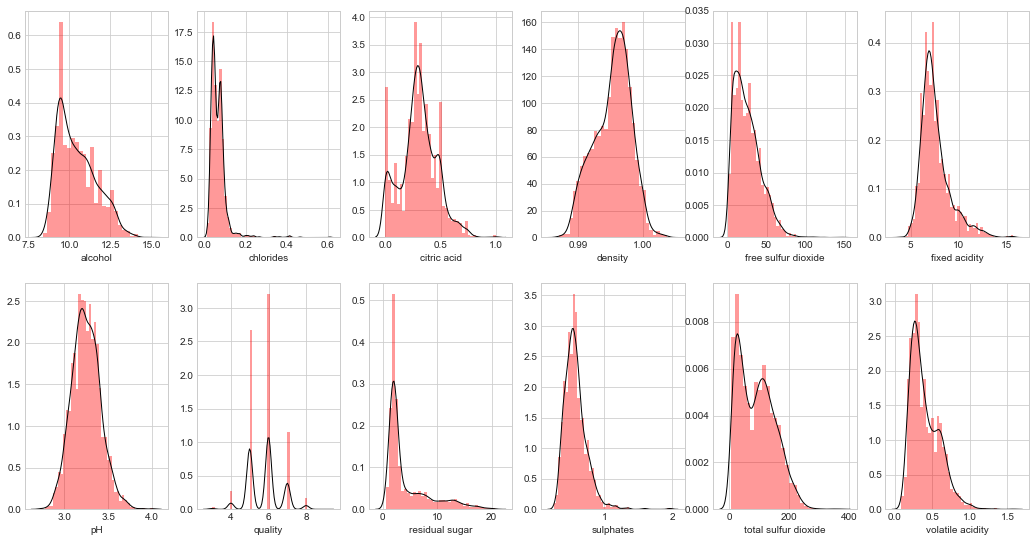

In [18]:
ncols = 6
col_list = red_white.columns.values                 # list of columns
nrows = len(selected)-1/ncols
plt.figure(figsize=(3*ncols,5*nrows))
for i in range(0,len(selected)):
    plt.subplot(nrows+1 ,ncols,i+1)
    sns.distplot(red_white[selected[i]],kde=True, 
                 kde_kws={'color': 'k', 'lw': 1},
                 color = 'r')


> _The pH column looks like normally distributed whereas most of the independent variables are positivly skewed._

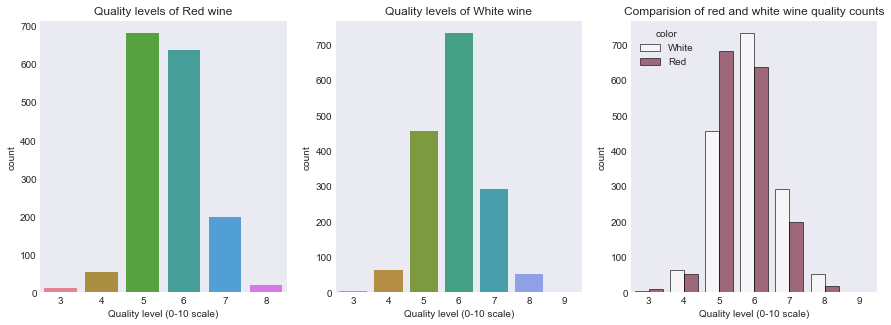

In [19]:
sns.set_style('dark')
plt.figure(figsize=(15,5))
color = ['Red','White']
# plot the quality of the two datasets
for i, j in enumerate(color,1):
        plt.subplot(1,3,i)
        sns.countplot(x ='quality', data = red_white[red_white['color']==j], palette="husl")
        plt.xlabel('Quality level (0-10 scale)')
        if j == 'Red':
            plt.title('Quality levels of {} wine'.format('Red'))
        elif j =='White':
            plt.title('Quality levels of {} wine'.format('White'))
# plot a quality comparision plot of the two types of wine
plt.subplot(1,3,3)
sns.countplot(x='quality', data=red_white, hue = 'color', 
              palette={'Red': '#7b0323', 'White': '#ffffff'},
              edgecolor='black',alpha = 0.6)
plt.title('Comparision of red and white wine quality counts')
plt.xlabel('Quality level (0-10 scale)')
plt.show()

> _Most values concentrated in the categories 5, 6 and 7 and white wines have more quality rating of 6 and 7 than the red wines._

 <a id='discover'> </a>
 ## 🔍Discovering relationships between attributes 

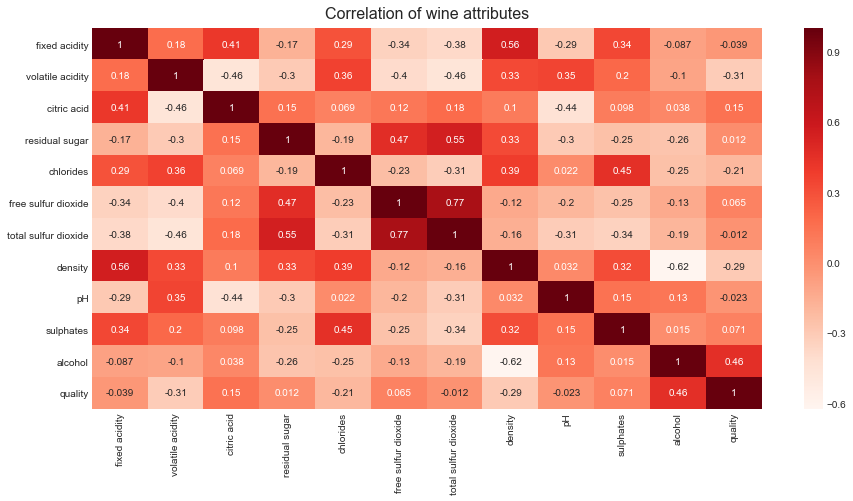

In [20]:
plt.subplots(figsize=(15,7))
ax = plt.axes()
corr = red_white.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="Reds", 
           annot = True)
ax.set_title('Correlation of wine attributes',
            {'fontsize': 16}, pad = 10)
plt.show()

From the above plot,
> We can see that, most of the correlations are a kind of weak. However, quality is a strongly correlated with an alcohol level of the wine and negatively correlated with density, volatile acidity, and chlorides. <br>
> Residual sugar has almost no correlation with quality.


Let us see the correlation of attributes of the two datasets separately.

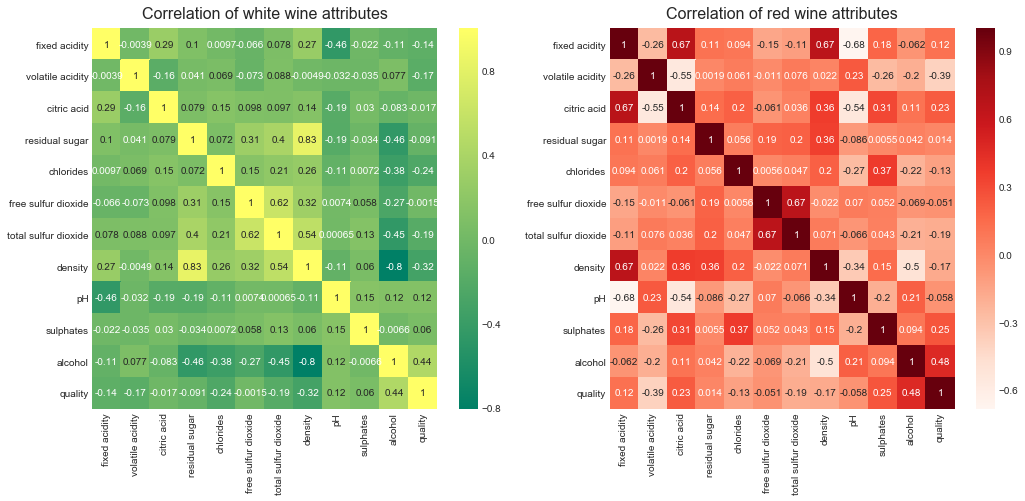

In [21]:
plt.subplots(1,2,figsize=(17,7))
# white wine attributes correlation
ax = plt.subplot(121)
corr = red_white[red_white['color']=='White'].corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap='summer', 
           annot = True)
ax.set_title('Correlation of white wine attributes',
            {'fontsize': 16}, pad = 10)

# red wine attributes correlation
ax = plt.subplot(122)
corr = red_white[red_white['color']=='Red'].corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="Reds", 
           annot = True)
ax.set_title('Correlation of red wine attributes',
            {'fontsize': 16}, pad = 10)
plt.show()

> - Quality of red wines is determined by alcohol, volatile acidity, sulphates, citric acid and density whereas quality of white wine is affected by alcohol, density, volatile acidity, chlorides and total sulfur dioxide respectively.

Let us see the relationship of some of the features

### 🥂 Density and Fixed acidity

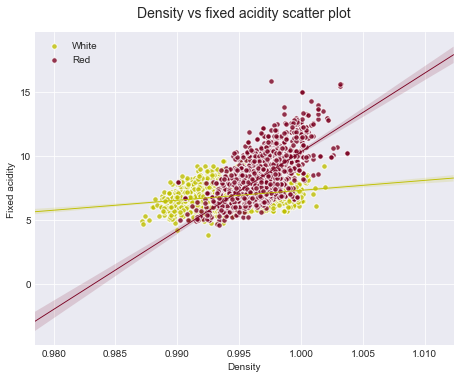

In [22]:
sns.set_style('darkgrid')
g = sns.lmplot('density', 'fixed acidity', data = red_white,
           hue = 'color', palette={'Red': '#7b0323', 'White': 'y'},
           scatter_kws={'s': 30, 'linewidths':1,'edgecolor':'w'},       
           line_kws={'lw':0.9},
           legend_out=False,
           size=5, aspect=1.3
          )
plt.legend(loc='best')
plt.title('Density vs fixed acidity scatter plot', {'fontsize': 14}, pad =15)
plt.xlabel('Density')
plt.ylabel('Fixed acidity')
plt.show()

> - As the amount of density increases, so do the fixed acidity. Sweeter wines have a higher density and also have higher fixed acidity level. <br>
- Red wines have a stronger density and fixed acidity correlation than white wine.


### 🥂 Residual sugar and total sulfur dioxide

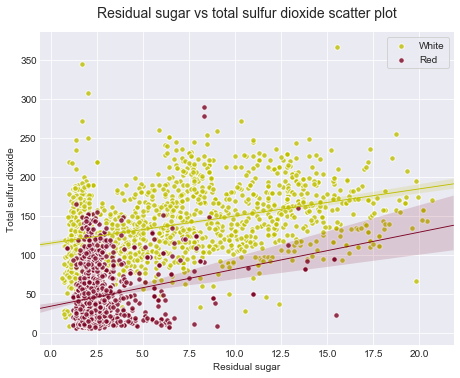

In [23]:
sns.lmplot('residual sugar', 'total sulfur dioxide', data = red_white,
           hue = 'color', palette={'Red': '#7b0323', 'White': 'y'},
           scatter_kws={"s": 30, 'linewidths':1,'edgecolor':'w'},       
           line_kws={'lw':0.9},
           legend_out=False,
           size=5, aspect=1.3
          )
               
plt.legend(loc='best', frameon = True)
plt.title('Residual sugar vs total sulfur dioxide scatter plot', {'fontsize': 14}, pad =15)
plt.xlabel('Residual sugar')
plt.ylabel('Total sulfur dioxide')
plt.show()

> - Residual sugar have a positive correlation with total sulfur dioxide. <br>
- White wines have strong residual sugar and total sulfur dioxide correlation as compared to red wines.

### 🥂 Fixed acidity and citric acid

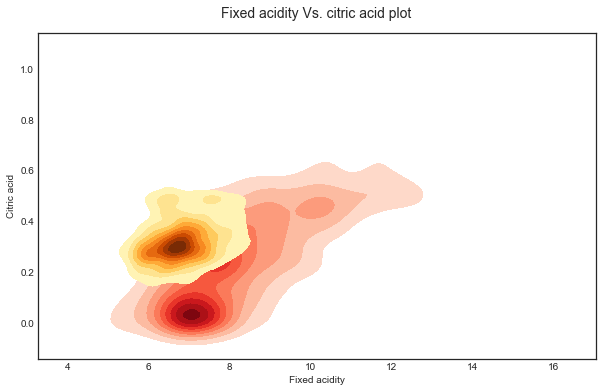

In [24]:
sns.set_style('white')
fig = plt.figure(figsize=(10,6))

ax = sns.kdeplot(red_white[red_white['color']=='Red']['fixed acidity'], 
                 red_white[red_white['color']=='Red']['citric acid'],   
                 cmap='Reds', 
                 shade=True, shade_lowest=False)
ax = sns.kdeplot(red_white[red_white['color']=='White']['fixed acidity'], 
                 red_white[red_white['color']=='White']['citric acid'],  
                 cmap='YlOrBr', 
                 shade=True, shade_lowest=False)

plt.title('Fixed acidity Vs. citric acid plot', {'fontsize': 14}, pad =15)
plt.xlabel('Fixed acidity')
plt.ylabel('Citric acid')
plt.show()

>- There is a positive correlation between citric acid and fixed acidity. 
- Red wines have strong positive citric acid and fixed acidity correlation than white wines.

### 🥂 pH level and fixed acidity

In [25]:
%run SeabornFig2Grid.ipynb             # run SeabornFig2Grid notebook 

C:\Users\ahsade\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


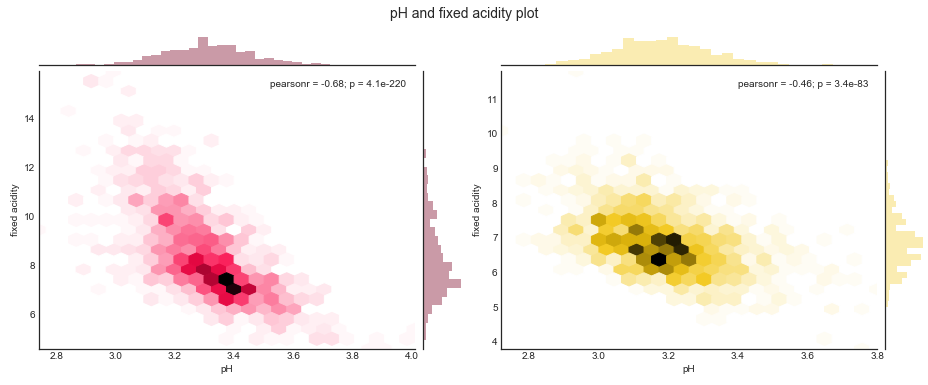

In [26]:
g = sns.jointplot('pH', 'fixed acidity', data = red_white[red_white['color']=='Red'], color = '#7b0323',
                   kind='hex', joint_kws=dict(gridsize=25),
                   space=0, size=7, ratio=8)
g1 = sns.jointplot('pH', 'fixed acidity', data=red_white[red_white['color']=='White'], color = '#F4D03F', 
                   kind='hex', joint_kws=dict(gridsize=25),
                   space=0, size=7, ratio=8)
fig = plt.figure(figsize=(13,5))
gs = gridspec.GridSpec(1, 2)
mg0 = SeabornFig2Grid(g, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
plt.suptitle('pH and fixed acidity plot', fontsize= 14, y = 1.06)
gs.tight_layout(fig)

>-  Fixed acidity contributes the most towards the pH of wines. A higher pH of the wine shows a lower acidity. 
- Acidic red wines are strongly correlated with fixed acidity than white wines. 
- Most wines are acidic with a pH value between 2.8 and 3.8.

### 🥂 Quality and volatile acidity

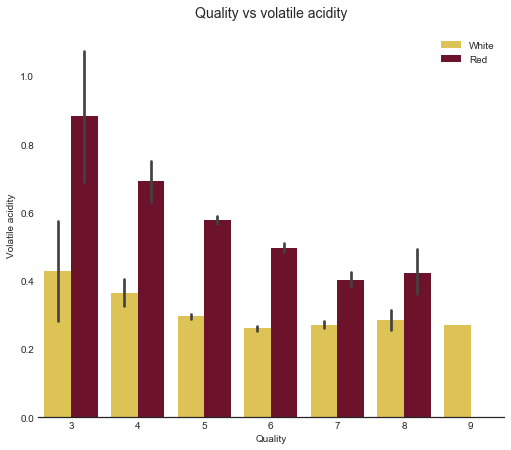

In [27]:
g = sns.factorplot('quality', 'volatile acidity', 'color',
                    data=red_white, kind='bar',
                    size=6, aspect = 1.2, palette={'Red': '#7b0323', 'White': '#F4D03F'},
                   legend_out=False)
g.despine(left=True)
plt.legend(loc = 1)
plt.title('Quality vs volatile acidity', {'fontsize': 14}, pad =15)
plt.xlabel('Quality')
plt.ylabel('Volatile acidity')
plt.show()

> This bar clearly shows that, as the quality of a red wine increases the volatile acidity decreases. However, in case of white wine, it looks like a minimal decrease in volatile acidity as the quality increases. 

### 🥂 Alcohol level and Quality

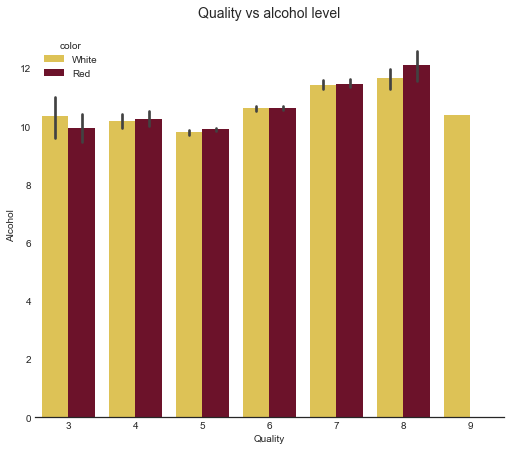

In [28]:
g = sns.factorplot('quality', 'alcohol', 'color',
                    data=red_white, kind='bar',
                    size=6, aspect = 1.2, palette={'Red': '#7b0323', 'White': '#F4D03F'},
                   legend_out=False)
g.despine(left=True)
plt.title('Quality vs alcohol level', {'fontsize': 14}, pad =15)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

> In both types of wine, higher quality associated with a slight increase of alcohol level.

Let us see some more correlations.

### 🥂 Volatile acidity and citric acid

C:\Users\ahsade\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


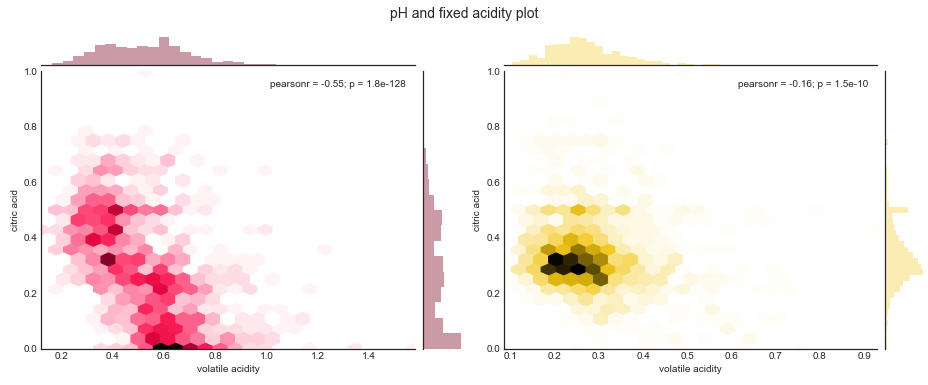

In [29]:
g = sns.jointplot('volatile acidity', 'citric acid', data=red_white[red_white['color']=='Red'], color = '#7b0323',
                   kind='hex', joint_kws=dict(gridsize=25),
                   space=0, size=7, ratio=8)
g1 = sns.jointplot('volatile acidity', 'citric acid', data=red_white[red_white['color']=='White'], color = '#F4D03F', 
                   kind='hex', joint_kws=dict(gridsize=25),
                   space=0, size=7, ratio=8)
fig = plt.figure(figsize=(13,5))
gs = gridspec.GridSpec(1, 2)
mg0 = SeabornFig2Grid(g, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
plt.suptitle('pH and fixed acidity plot', fontsize= 14, y = 1.06)
gs.tight_layout(fig)

>- A higher volatile acidity is usually associated with low citric acid levels. 
- Most of the wines are within the legal limits which are 1.2g/L for red wine and 1.1g/L for white wine.  
- Majority of white wines have a volatile acidity of less than 0.4.
- Red wines have a stronger negative correlation as compared to white wines.

Let us see a couple of pairplots

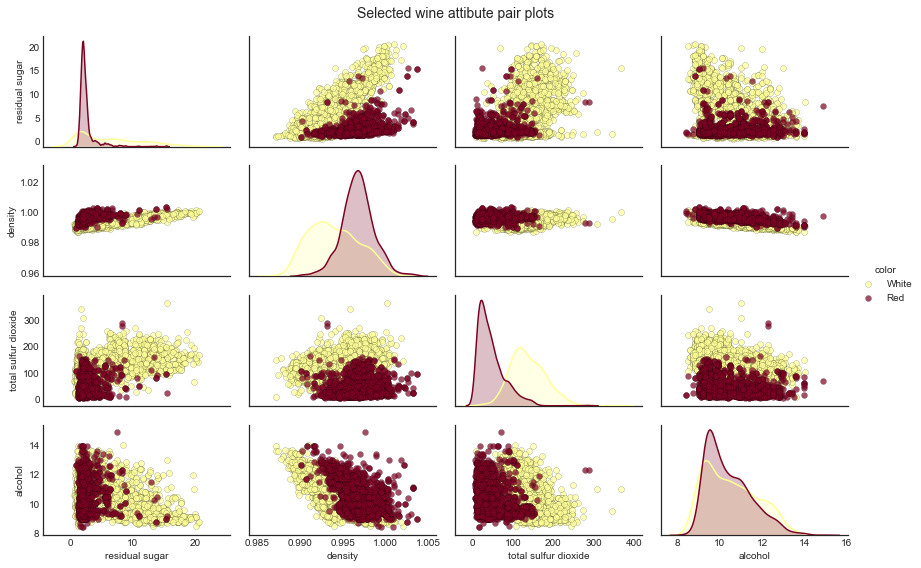

In [30]:
attributes = ['residual sugar', 'density', 'total sulfur dioxide','alcohol', 'color']

g = sns.pairplot(red_white[attributes], hue = 'color', 
             size=2, aspect=1.5,
             palette={'Red': '#7b0323', 'White': '#ffff99'},
             plot_kws=dict(edgecolor='k', linewidth = 0.2, alpha = 0.7),
             diag_kws=dict(shade=True),      # adjust the diagonal plots
             diag_kind = 'kde')              # use "kde" for diagonal plots
fig = g.fig
fig.subplots_adjust(top=0.93, wspace=0.1)
a = fig.suptitle('Selected wine attibute pair plots',  fontsize=14)

The pairwise plot shows that.
>- Alcohol content of wine is negatively associated with the rest attributes.
- White wines alcohol level has a strong negative correlation with residual sugar.
- Also, white wines density is strongly correlated with total sulfur dioxide as compared to red wines.

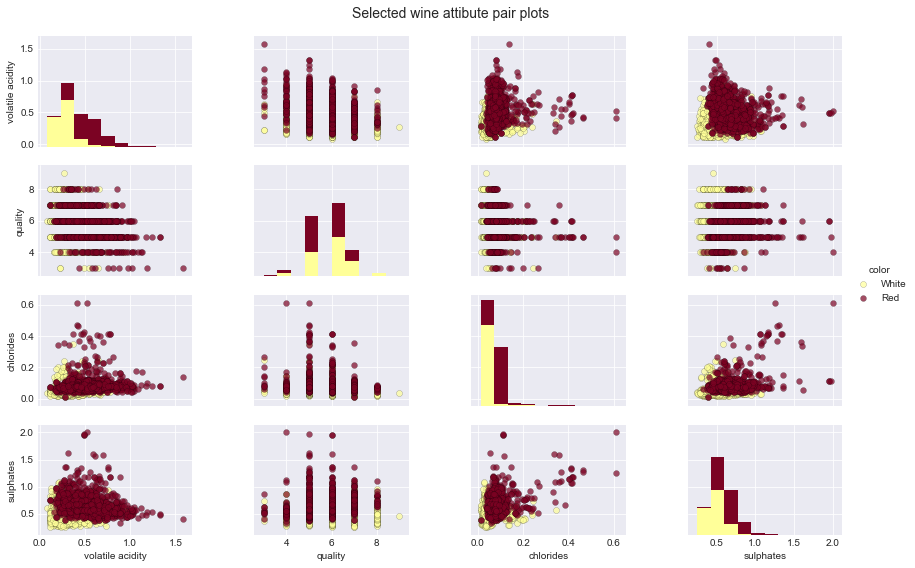

In [31]:
sns.set_style('darkgrid')
attributes = ['volatile acidity','quality','chlorides','sulphates','color']

g = sns.pairplot(red_white[attributes], hue = 'color', 
             size=2, aspect=1.5,
             palette={'Red': '#7b0323', 'White': '#ffff99'},
             plot_kws=dict(edgecolor='k', linewidth = 0.2, alpha = 0.7))              # use "kde" for diagonal plots
fig = g.fig
fig.subplots_adjust(top=0.93, wspace=0.4)
a = fig.suptitle('Selected wine attibute pair plots',  fontsize=14)


From the above pair wise plot,
>- Quality has a negative correlation with both volatile acidity and chlorides and positivly associated with sulphates.
- Wines with higer quality contains lesser chloride. 
- Red wines quality have a strong positive correlation with sulphates than white wines.
- Red wines have a stronger chlorides and sulphates correlation than white wines. 

Let us do more analysis of attributes

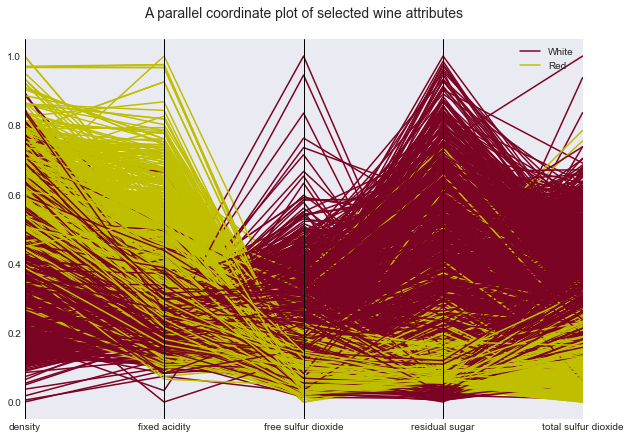

In [32]:
# Standardizing the data using MinMaxScaler - To get a better out come
selected = ['density', 'fixed acidity','free sulfur dioxide','residual sugar','total sulfur dioxide',]
subset_df = red_white[selected]
scaler = MinMaxScaler()
wine_scaled = scaler.fit(subset_df).transform(subset_df)           # transform the data using the MinMaxScaler

scaled_df = pd.DataFrame(wine_scaled, columns=selected)
final_df = pd.concat([scaled_df, red_white['color']], axis=1)          # concat with color column

plt.figure(figsize=(10,7))
p = parallel_coordinates(final_df, 'color', color = ['#7b0323','y'] )
plt.title('A parallel coordinate plot of selected wine attributes', fontsize = 14, y = 1.04)
plt.show()

> The above parallel plot illustrates,
- White wines contains more free sulfur dioxide, total sulfur dioxide , and residual sugar as compared to white wines. 
- Fixed acidity and density is higher for red wines as compared to white.

<a id='quality'> </a>
## 👫 Quality Vs. other attributes relationship

### 🥂 Quality Vs. Sulphates

C:\Users\ahsade\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


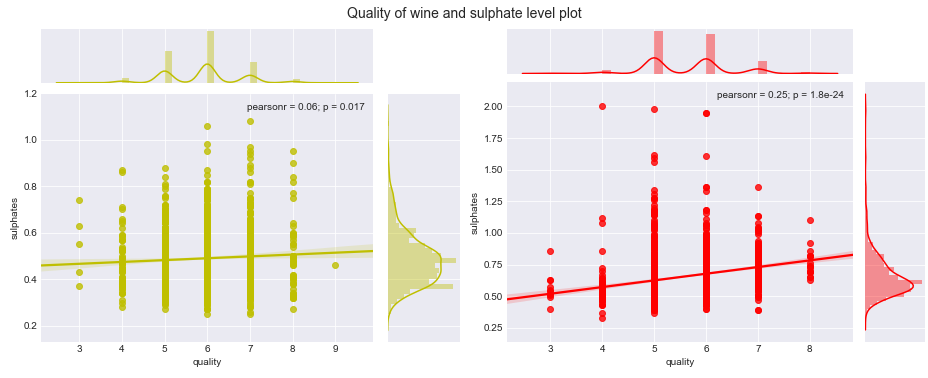

In [33]:
g = sns.jointplot(x= 'quality', y='sulphates', data=red_white[red_white['color']=='White'],
              kind='reg', space=0, size=5, ratio=4, color = 'y')

g1 = sns.jointplot(x= 'quality', y='sulphates',  data=red_white[red_white['color']=='Red'],
              kind='reg', space=0, size=5, color = 'r')

fig = plt.figure(figsize=(13,5))
gs = gridspec.GridSpec(1, 2)
mg0 = SeabornFig2Grid(g, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
plt.suptitle('Quality of wine and sulphate level plot', fontsize= 14, y = 1.04)
gs.tight_layout(fig)


>- Red wines have a higher sulphate level when compared to white wines.
- Also red wines quality is strongly related to sulphates as compared to white.

### 🥂 Quality Vs. Chlorides

C:\Users\ahsade\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


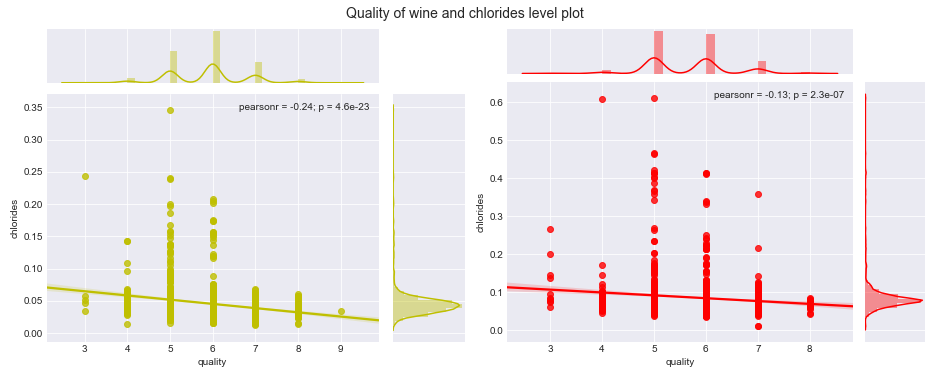

In [34]:
g = sns.jointplot(x= 'quality', y='chlorides', data=red_white[red_white['color']=='White'],
              kind='reg', space=0, size=5, ratio=4, color = 'y')

g1 = sns.jointplot(x= 'quality', y='chlorides',  data=red_white[red_white['color']=='Red'],
              kind='reg', space=0, size=5, color = 'r')

fig = plt.figure(figsize=(13,5))
gs = gridspec.GridSpec(1, 2)
mg0 = SeabornFig2Grid(g, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
plt.suptitle('Quality of wine and chlorides level plot', fontsize= 14, y = 1.04)
gs.tight_layout(fig)

>- In both types, as quality increases the wine becomes less salty. 
- However, quality of white wines have a strong negative correlation with chlorides as compared to red wines.

### 🥂 Quality Vs. Volatile acidity

C:\Users\ahsade\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


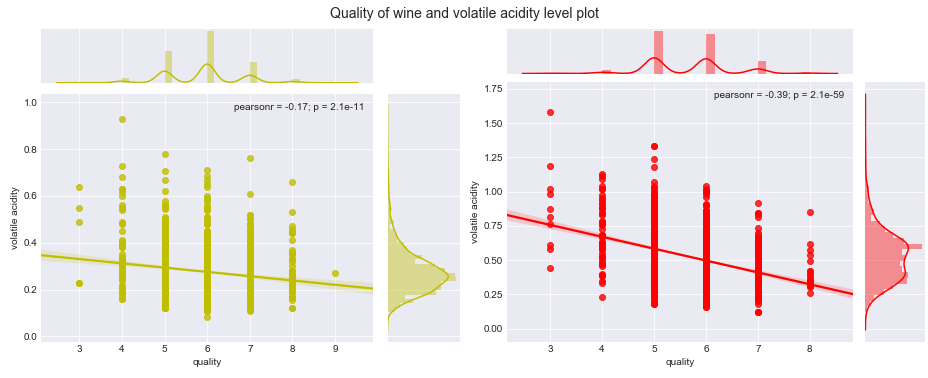

In [35]:
g = sns.jointplot(x= 'quality', y='volatile acidity', data=red_white[red_white['color']=='White'],
              kind='reg', space=0, size=5, ratio=4, color = 'y')

g1 = sns.jointplot(x= 'quality', y='volatile acidity',  data=red_white[red_white['color']=='Red'],
              kind='reg', space=0, size=5, color = 'r')

fig = plt.figure(figsize=(13,5))
gs = gridspec.GridSpec(1, 2)
mg0 = SeabornFig2Grid(g, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
plt.suptitle('Quality of wine and volatile acidity level plot', fontsize= 14, y = 1.04)
gs.tight_layout(fig)

> Quality of red wines has a strong negative correlation with volatile acidity than white wines.

### 🥂 Quality Vs. Alcohol

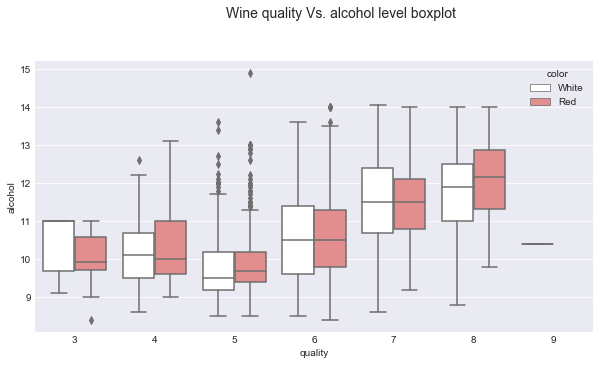

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
g = sns.boxplot('quality','alcohol',hue = 'color',data = red_white, 
                palette = {'Red': '#f08080','White':'w'}, ax = axes)
plt.suptitle('Wine quality Vs. alcohol level boxplot',fontsize= 14, x = 0.55, y = 1.03)
plt.show()

>- It look like, in both wines, as alcohol level increases the quality also increases. 
- As quality increases the median alcohol level of red wines is greater than white wine.

### 🥂 Quality Vs. Density

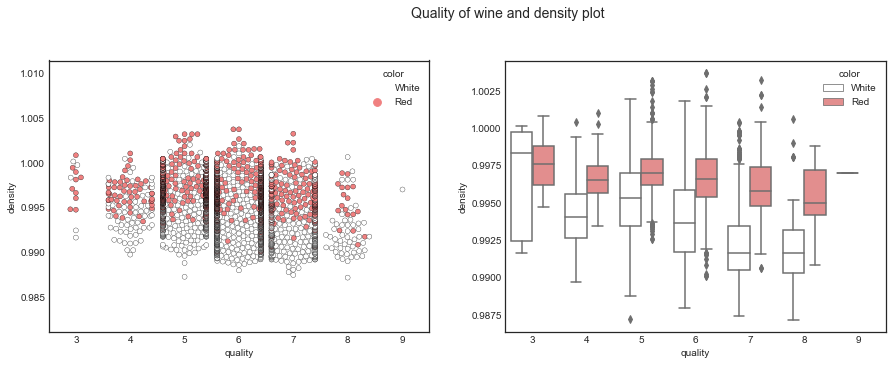

In [37]:
sns.set_style('white')
f,(ax1,ax2) = plt.subplots(1,2,figsize= (15,5))
g = sns.swarmplot('quality','density',data = red_white, hue ='color',
                  palette= {'Red': '#f08080', 'White': 'w'}, 
                  linewidth = .3, edgecolor ='k',
                  ax= ax1)

g1 = sns.boxplot('quality','density',hue = 'color',data = red_white, 
                palette = {'Red': '#f08080','White':'w'}, ax = ax2)
g = plt.suptitle('Quality of wine and density plot', fontsize= 14, x = 0.55, y = 1.03)

From the above two plots,
>-  Red wines have more density than white wine.
- As the quality increases, the density of white wines decreases faster than red wines. 

### 🥂 Quality type and other attributes

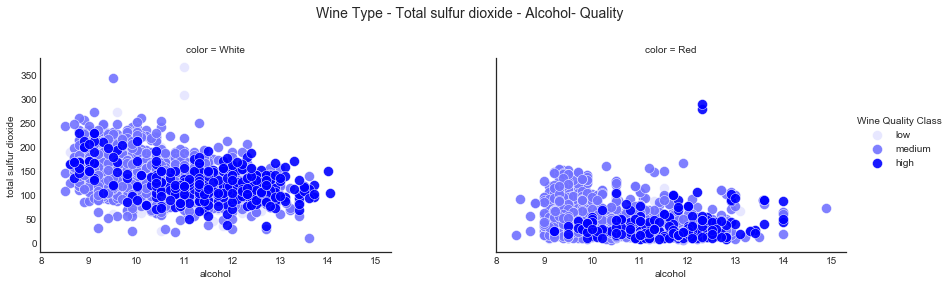

In [38]:
g = sns.FacetGrid(red_white, 
                  col='color', 
                  hue='q_label',        
                  hue_order=['low', 'medium', 'high'],
                  aspect=1.5, 
                  size=4, 
                  palette=sns.light_palette('blue', 3)[0:])

g.map(plt.scatter,
      'alcohol',    
      'total sulfur dioxide', 
      s = 100,
      alpha=0.9, 
      edgecolor='white', linewidth=0.5)

fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Total sulfur dioxide - Alcohol- Quality', fontsize=14)
g = g.add_legend(title='Wine Quality Class')


>- The above plot shows analysis of wine type, volatile acidity, quality and alcohol level.
- High quality(dark blue) wines have higher level of alcohol and lower level of total sulfur dioxide than medium and low quality wines.
- Total sulfur dioxide level is slightly greater in white wine than the red wine. 


Let us now try with other variables

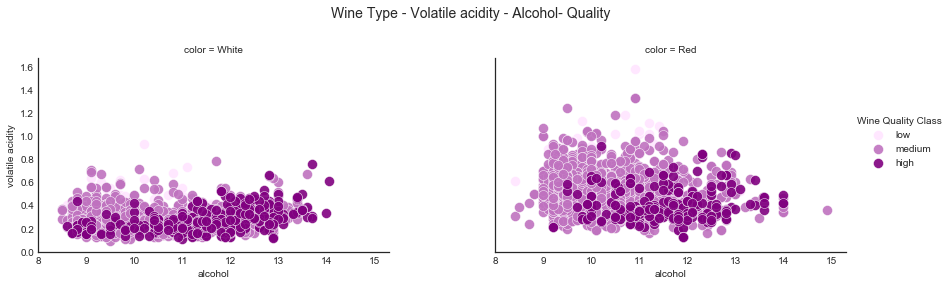

In [39]:
g = sns.FacetGrid(red_white, 
                  col='color',            
                  hue='q_label',        
                  hue_order=['low', 'medium', 'high'],
                  aspect=1.5, 
                  size=4, 
                  palette=sns.light_palette('purple', 3)[0:])

g.map(plt.scatter,
      'alcohol',
      'volatile acidity',     
      s = 100,
      alpha=0.9, 
      edgecolor='white', linewidth=0.5)

fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Volatile acidity - Alcohol- Quality', fontsize=14)
g = g.add_legend(title='Wine Quality Class')

>- This plot visualizes the realtionship between wine type: alcohol, volatile acidity and quality levels.
- High quality wines have higher alcohol level and lower volatile acidity as compared to medium and low wine types.
- Volatile acidity level of white wines are slightly lower than red wines.

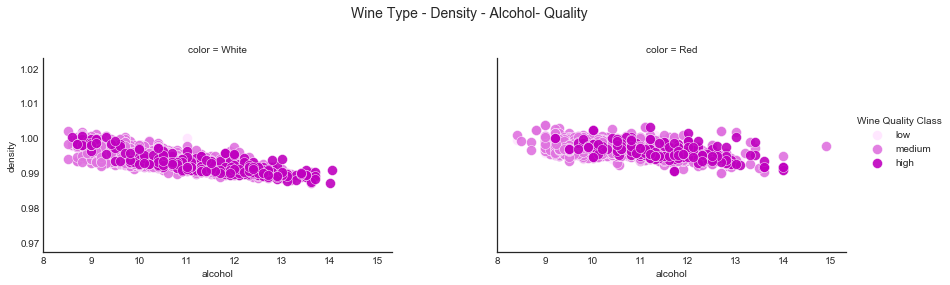

In [40]:
g = sns.FacetGrid(red_white, 
                  col='color',               
                  hue='q_label',        
                  hue_order=['low', 'medium', 'high'],
                  aspect=1.5, 
                  size=4, 
                  palette=sns.light_palette('m', 3)[0:])

g.map(plt.scatter,
      'alcohol',
      'density',     
      s = 100,
      alpha=0.9, 
      edgecolor='white', linewidth=0.5)

fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Density - Alcohol- Quality', fontsize=14)
g = g.add_legend(title='Wine Quality Class')

> High-quality wines have higher alcohol content and lower density when compared to medium and low.

<a id='conclusion'> </a>
## Conclusion

>- Quality of wine almost affected by all input variables (based on physicochemical tests). 
- The quality of wine positivly affected by the amount of alcohol and negativly affected by density, salt content and acidity.
- High-quality wines have higher level of alcohol and lower level of sulfur, density and acidity as compared to medium and low quality wines.
__Red wine__
- Quality of red wine is associated with alcohol, acidity, sulphate, citric acid and sulfur dioxide accordingly. 
- Red wine contains less sulfur dioxide as compared to white wine.
- pH, free sulfur dioxide and residual sugar have no or minimal impact on quality of red wine. <br>
__White wine__
- Density and fixed acidity is high in white wines
- White wines associated with alcohol, density, acidity, chlorides and total sulfur dioxide level respectively.
- Sulphates, fixed acidity and free sulfur dioxide have no or minimal impact on the quality of white wine.

<a id='references'> </a>
## References

- Christian. (2017, November 5). Get Started with Machine Learning. Retrieved May 26, 2018, from [machinelearningskills.com](https://www.machinelearningskills.com/get-started-with-machine-learning/)
- Hariharan, A. (2018, February 7). How To Use Data Science To Understand What Makes Wine Taste Good. Retrieved May 20, 2018, from [freecodecamp.org](https://medium.freecodecamp.org/using-data-science-to-understand-what-makes-wine-taste-good-669b496c67ee)
- Matplotlib. (n.d.). Retrieved May 27, 2018, from [matplotlib.org](https://matplotlib.org/)
- Numpy. (n.d.). Retrieved May 27, 2018, from [numpy.org] (http://www.numpy.org/)
- Pandas. (n.d.). Retrieved May 27, 2018, from [pandas.pydata.org](http://pandas.pydata.org/)
- Portuguese Wine - Wikipedia. (n.d.). Retrieved May 25, 2018, from [wikipedia](https://en.wikipedia.org/wiki/Portuguese_wine)
- Seaborn: statistical data visualization. (n.d) Retrieved May 20, 2018, from [seaborn](http://seaborn.pydata.org/index.html)
- Wine - Wikipedia. (n.d.). Retrieved May 22, 2018, from [wikipedia](https://en.wikipedia.org/wiki/Wine)